In [16]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:

df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.notnull().sum()

,0
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768
Outcome,768


In [19]:
df.shape

(768, 9)

In [20]:
df.duplicated().sum()

np.int64(0)

Now we are going to apply box plot to seee the outliers and then we will remove them using z- score or IQR method

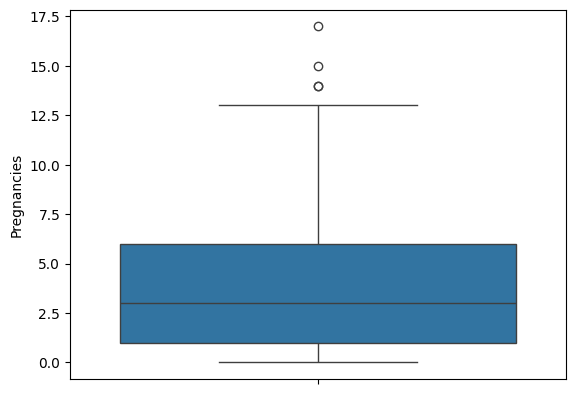

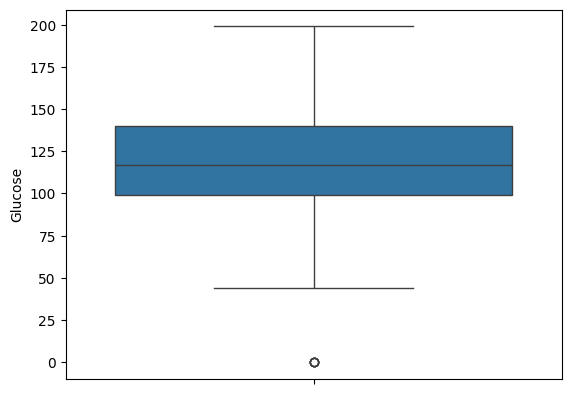

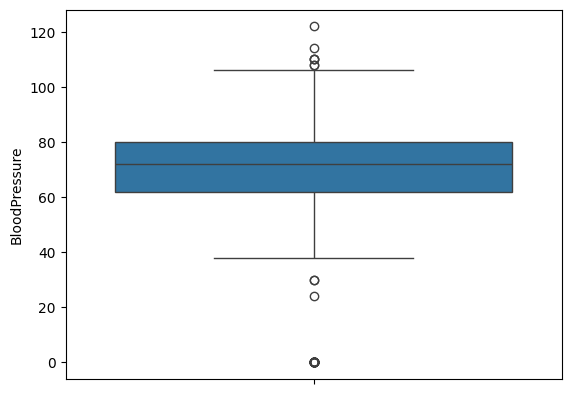

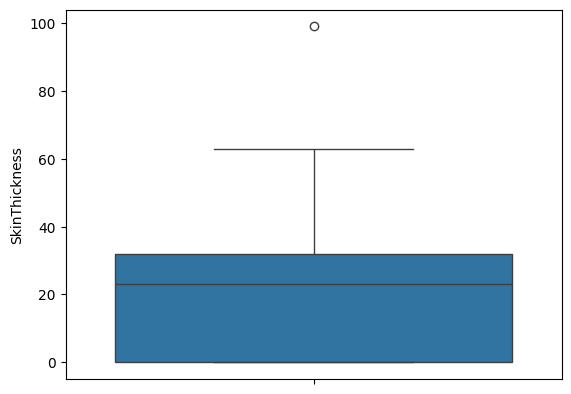

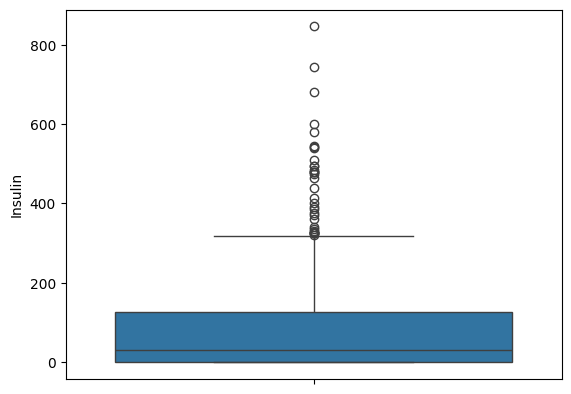

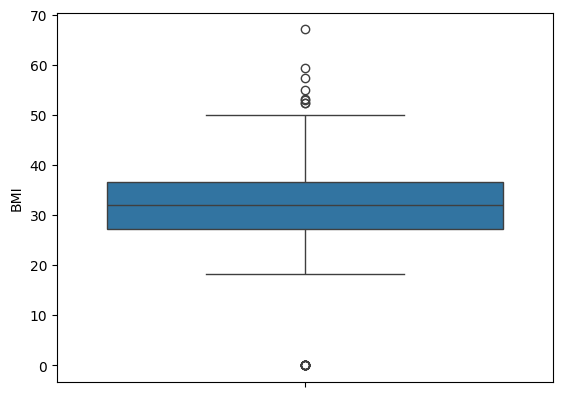

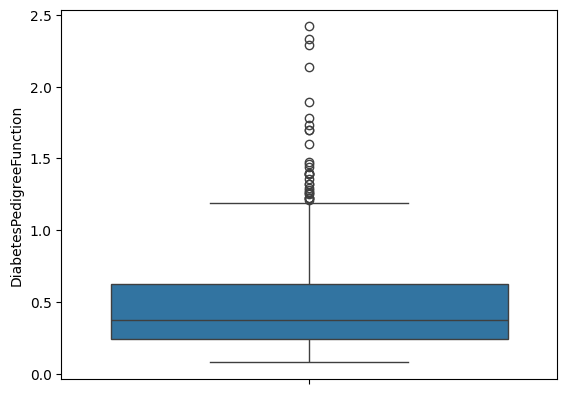

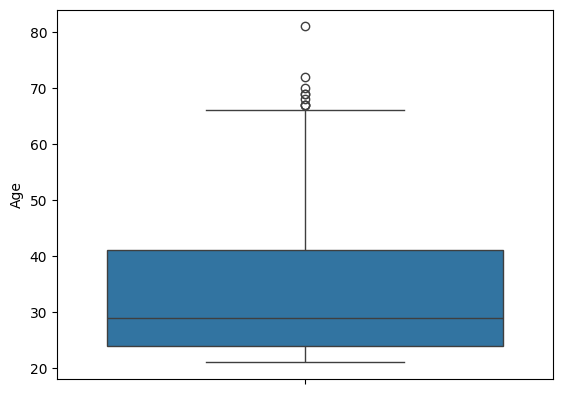

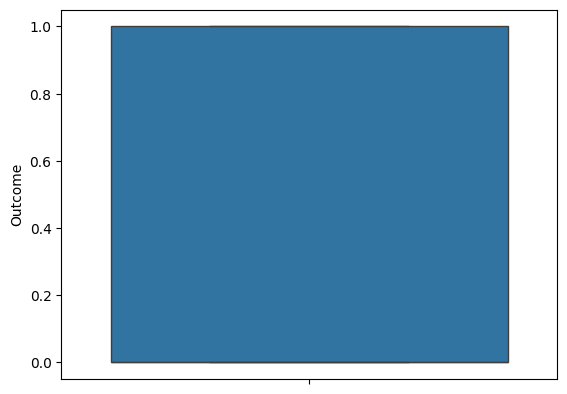

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])


As we noe it is best to apply z score on normally distributted data and IQR  on skewwed data

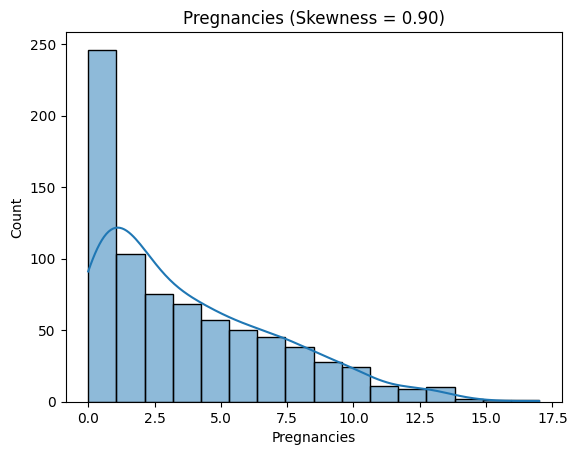

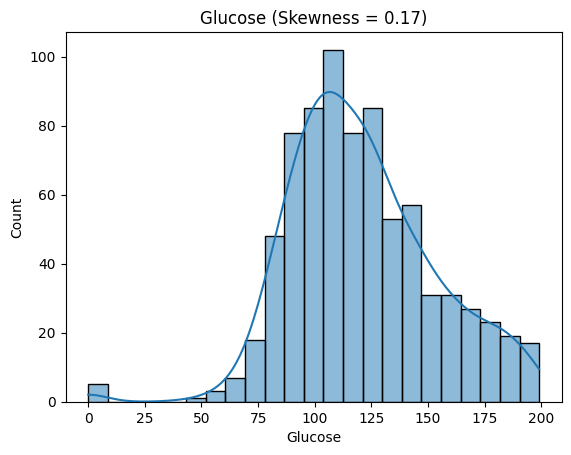

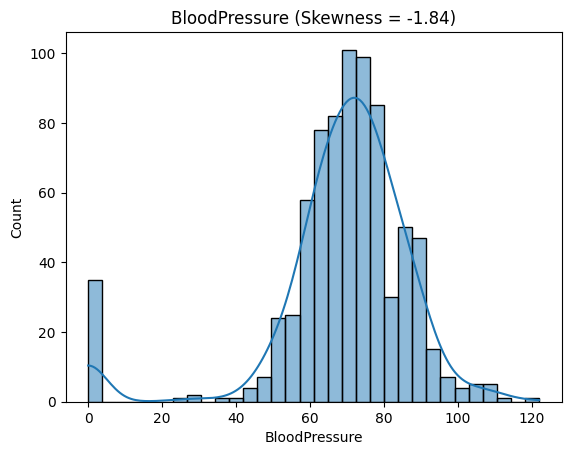

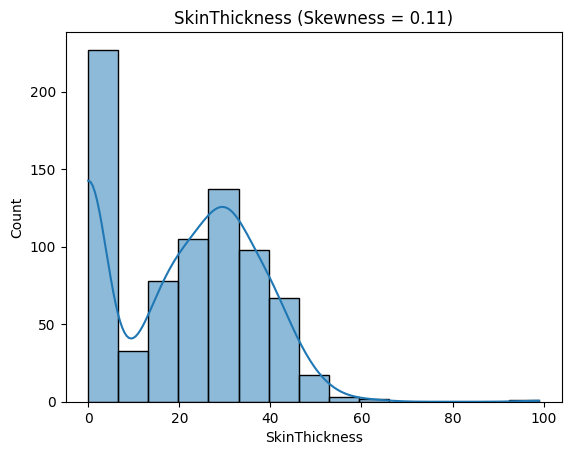

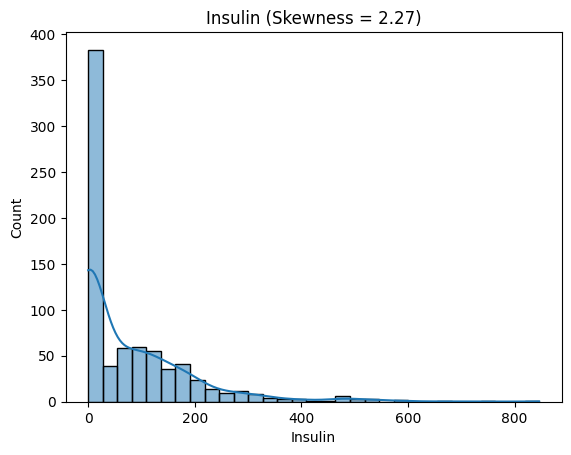

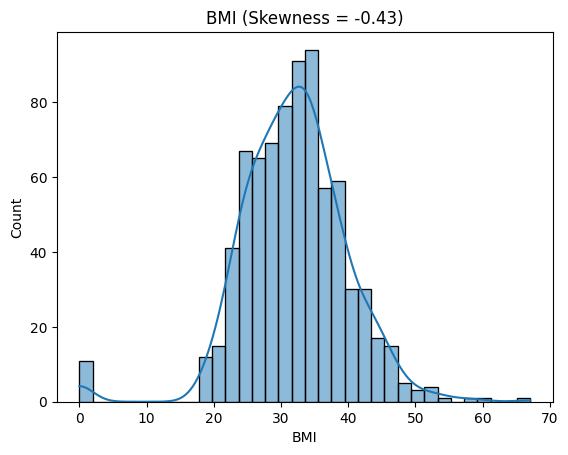

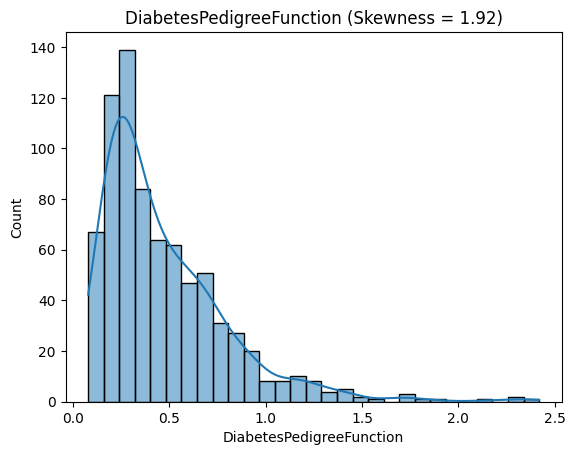

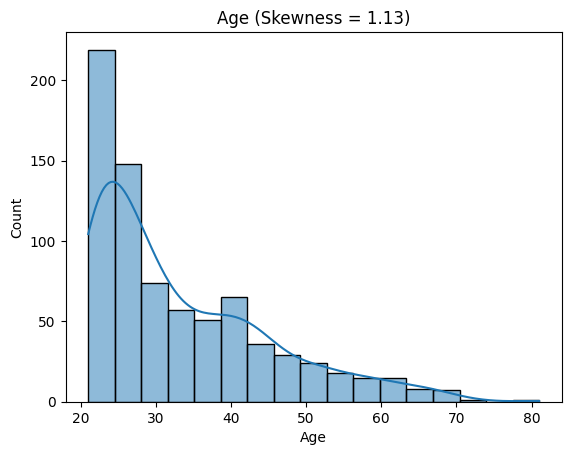

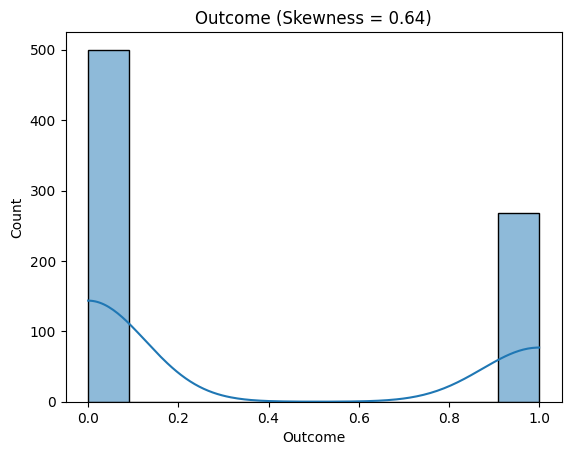

In [22]:

for i in df.columns:
  plt.figure()
  sns.histplot(df[i],kde=True)
  skew_val = df[i].skew()
  plt.title(f'{i} (Skewness = {skew_val:.2f})')

seperate the X and Y features

In [23]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

Now we will seperate X features between skewed and normal data

In [24]:
normal_features=[]
skewed_features=[]
for i in X.columns:
  if abs(X[i].skew())<2:
    normal_features.append(i)
  else:
    skewed_features.append(i)


now we will apllied z score(standard deviation method) on the normal_features and IQR on the skewed_features

In [25]:
#IQR
for i in skewed_features:
  Q1=X[i].quantile(0.25)
  Q3=X[i].quantile(0.75)
  IQR=Q3-Q1
  upper_limit=Q3+1.5*IQR
  lower_limit=Q1-1.5*IQR
  df = df[(X[i] < upper_limit) & (X[i] > lower_limit)]

#Z-score
for i in normal_features:
  mean=X[i].mean()
  std=X[i].std()
  upper_limit=mean+3*std
  lower_limit=mean-3*std
  df = df[(X[i] < upper_limit) & (X[i] > lower_limit)]

/tmp/ipython-input-2656295361.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(X[i] < upper_limit) & (X[i] > lower_limit)]
/tmp/ipython-input-2656295361.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(X[i] < upper_limit) & (X[i] > lower_limit)]
/tmp/ipython-input-2656295361.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(X[i] < upper_limit) & (X[i] > lower_limit)]
/tmp/ipython-input-2656295361.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(X[i] < upper_limit) & (X[i] > lower_limit)]
/tmp/ipython-input-2656295361.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(X[i] < upper_limit) & (X[i] > lower_limit)]
/tmp/ipython-input-2656295361.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(X[i] < upper_limit) & (X[i] > lower_

In [26]:
X.shape

(768, 8)

Now we have prepaired our data so we will go with decision tree (classification)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)
p=model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,classification_report
accuracy=accuracy_score(y_test,model.predict(X_test))
f1=f1_score(y_test,model.predict(X_test))
CM=confusion_matrix(y_test,model.predict(X_test))
print(f"F1 Score is :{f1}")
print(classification_report(y_test,model.predict(X_test)))
print(f"Acuracy Score is :{accuracy}")
print(CM)

F1 Score is :0.6666666666666666
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Acuracy Score is :0.7532467532467533
[[78 21]
 [17 38]]


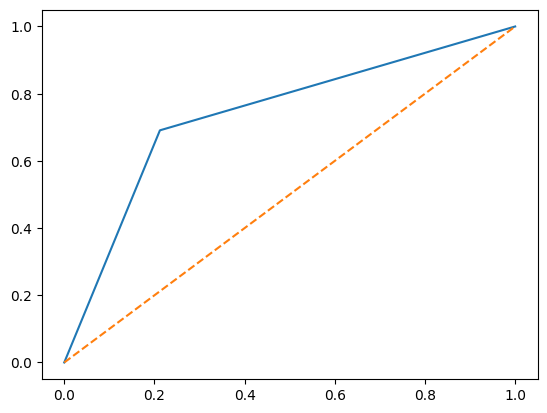

In [31]:
fpr,tpr,threshold=roc_curve(y_test,p)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle="--")